In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load your data from CSV
data = pd.read_csv('Trade signals data.csv')

# Display the columns
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['Date', 'Nifty close', 'Change', 'Nifty (n-1) close', '20DMA',
       'Nifty - 20DMA', 'Nifty - 20DMA squared', '20DMA crossing',
       '10D MA change', 'Range', 'ATR', 'OI change', 'COI change', 'PCR TW',
       'RSI', 'FII net', 'DII net', 'FII + DII net', 'PE', '10D MA FII net',
       '10D MA DII net', 'Range between Max Ois', 'PCR TW change', 'PE change',
       'Up streak', 'Down streak', 'Up', 'Down', 'Up 2.17%', 'Down 2.07%',
       'Up 1.11% to 2.17%', 'Down 1.01% to 2.07%', 'Up upto 1.11%',
       'Down upto 1.01%', 'Classification'],
      dtype='object')


In [4]:
# Choose features and target variable interactively (replace 'feature_columns' and 'target_column' with your choices)
feature_columns = [
       'Nifty - 20DMA', 'Nifty - 20DMA squared']
target_column = 'Change'

# Separate features and target variable
X = data[feature_columns]
y = data[target_column]
print(y)

0       19.85
1     -432.15
2      137.90
3      134.80
4      148.15
        ...  
964    -51.15
965     -6.90
966   -257.85
967   -324.40
968    -26.35
Name: Change, Length: 969, dtype: float64


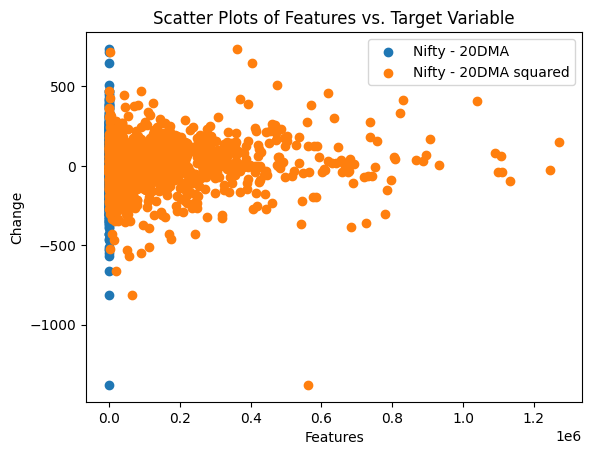

In [5]:
# Scatter plots for selected features vs. target variable
for feature in feature_columns:
    plt.scatter(X[feature], y, label=feature)

plt.xlabel('Features')
plt.ylabel(target_column)
plt.title('Scatter Plots of Features vs. Target Variable')
plt.legend()
plt.show()

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.77066809,  0.04037789],
       [ 0.46307075, -0.39356941],
       [-1.29914389, -0.06556187],
       ...,
       [ 1.29884527,  1.12608807],
       [ 0.03996461, -0.75194583],
       [ 0.18778765, -0.65813333]])

In [8]:
# Create a linear regression model
model = LinearRegression()

In [9]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

-0.011708102222416583

In [12]:
# Print model coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [-3.00307673e-02  6.14709839e-05]
Intercept: 5.915322675818238
Mean Squared Error: 35474.66059477079
R-squared: -0.011708102222416583


In [13]:
# Plot the regression line (for visualization in case of 2D features)
if X_test_scaled.shape[1] == 1:
    plt.scatter(X_test_scaled, y_test, color='black', label='Actual data')
    plt.plot(X_test_scaled, y_pred, color='blue', linewidth=3, label='Regression line')
    plt.xlabel('X (scaled)')
    plt.ylabel('y')
    plt.title('Linear Regression Example with Scaled Features')
    plt.legend()
    plt.show()